In [37]:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [38]:
ds = xr.open_dataset("mets/input_temp0.nc", engine="netcdf4")
ds_2 = xr.open_dataset("mets/input0.nc", engine="netcdf4")

In [45]:
ds["temperature"].values


array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [225.51462, 225.57504, 225.61928, ..., 223.636  , 223.67392,
        223.71184],
       [233.04482, 232.94357, 232.85245, ..., 234.1621 , 234.17465,
        234.1872 ],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

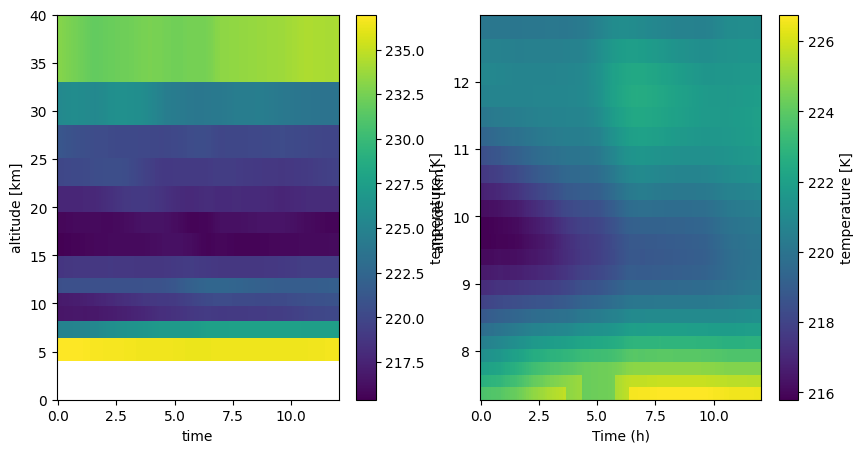

In [40]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ds.coords['time'] = ds.coords['time'].astype('float')/(10**9 * 60 * 60)
ds["temperature"].plot(ax = axes[0])

axes[0].set_ylim(0,40)

ds_2.coords['time'] = ds_2.coords['time'].astype('float')/(10**9 * 60 * 60)
ds_2["temperature"].plot(ax = axes[1])

plt.xlabel("Time (h)")
plt.show()

